# 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Ecommerce Customers")
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

* Avg. Session Length: 스타일리스트와 함께한 시간
* Time on App: 쇼핑을 위한 어플 사용 시간
* Time on Website: 쇼핑을 위한 웹 사용 시간
* Length of Membership : 멤버쉽 유지 기간
* Yearly Amount Spent: 연간 지출 금액

# 전처리

* 회귀에 필요없는 컬럼 제거

In [5]:
df = df.drop(['Email',"Address","Avatar"], axis=1) 

* 회귀선을 이용한 상관분석

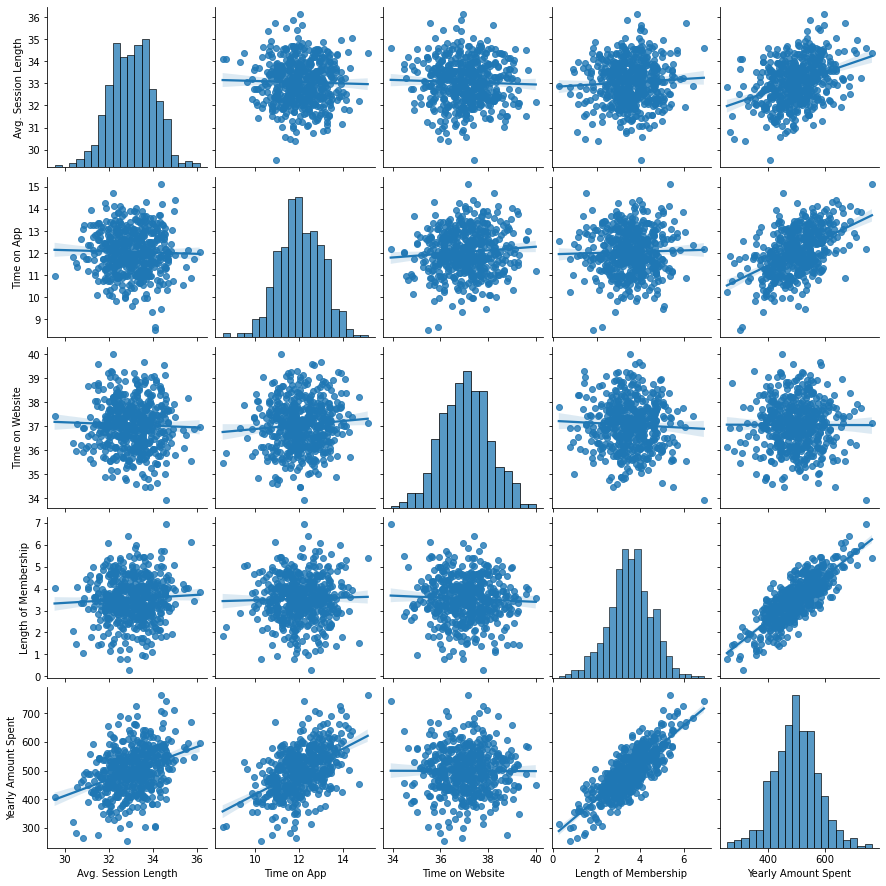

In [6]:
sns.pairplot(df, kind = "reg");

# 이상치 확인

In [7]:
def boxplot_multi(data): 
    cols = []
    for i in data.columns:
        if data[i].dtypes == "float64" or data[i].dtypes == 'int64':
            cols.append(i)  # column 명 추출
    gp = plt.figure(figsize=(20,20))  # figure 생성
    gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(1, 5, i)
        sns.boxplot(data=data, y = cols[i-1])
        ax.set_title(f'Boxplot for {cols[i-1]}')

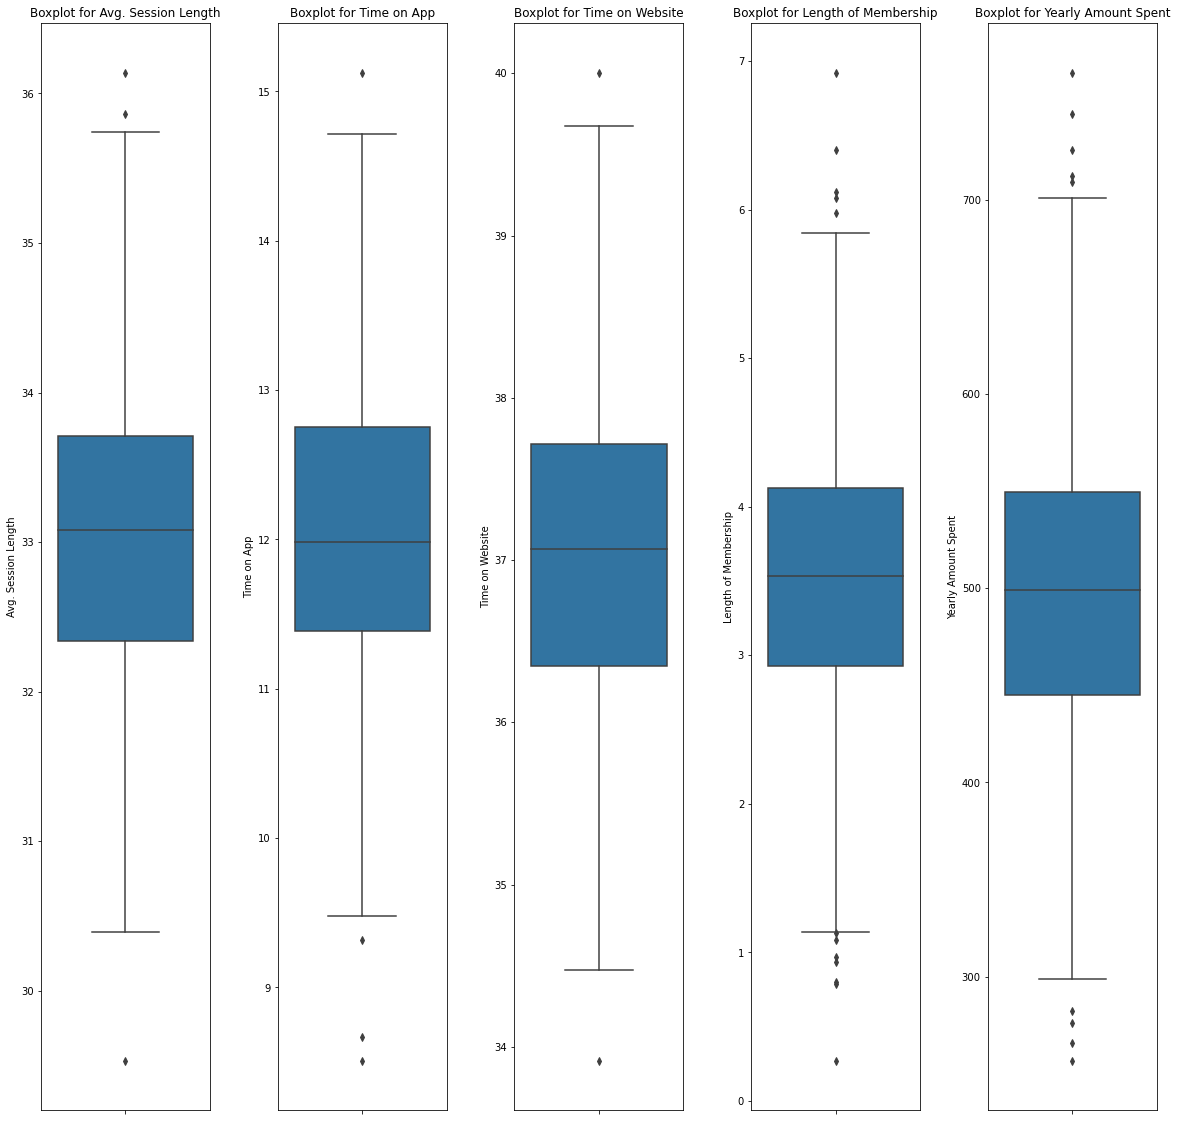

In [8]:
boxplot_multi(df)

* 이상치 제거

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

modi_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
modi_df

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.497268    12.655651        39.577668              4.082621   
1              31.926272    11.109461        37.268959              2.664034   
2              33.000915    11.330278        37.110597              4.104543   
3              34.305557    13.717514        36.721283              3.120179   
4              33.330673    12.795189        37.536653              4.446308   
..                   ...          ...              ...                   ...   
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054  
1             392.204933  
2             487.547505  
3             581.852344  
4             599.406092  
..                   ...  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642  

[476 rows x 5 columns]

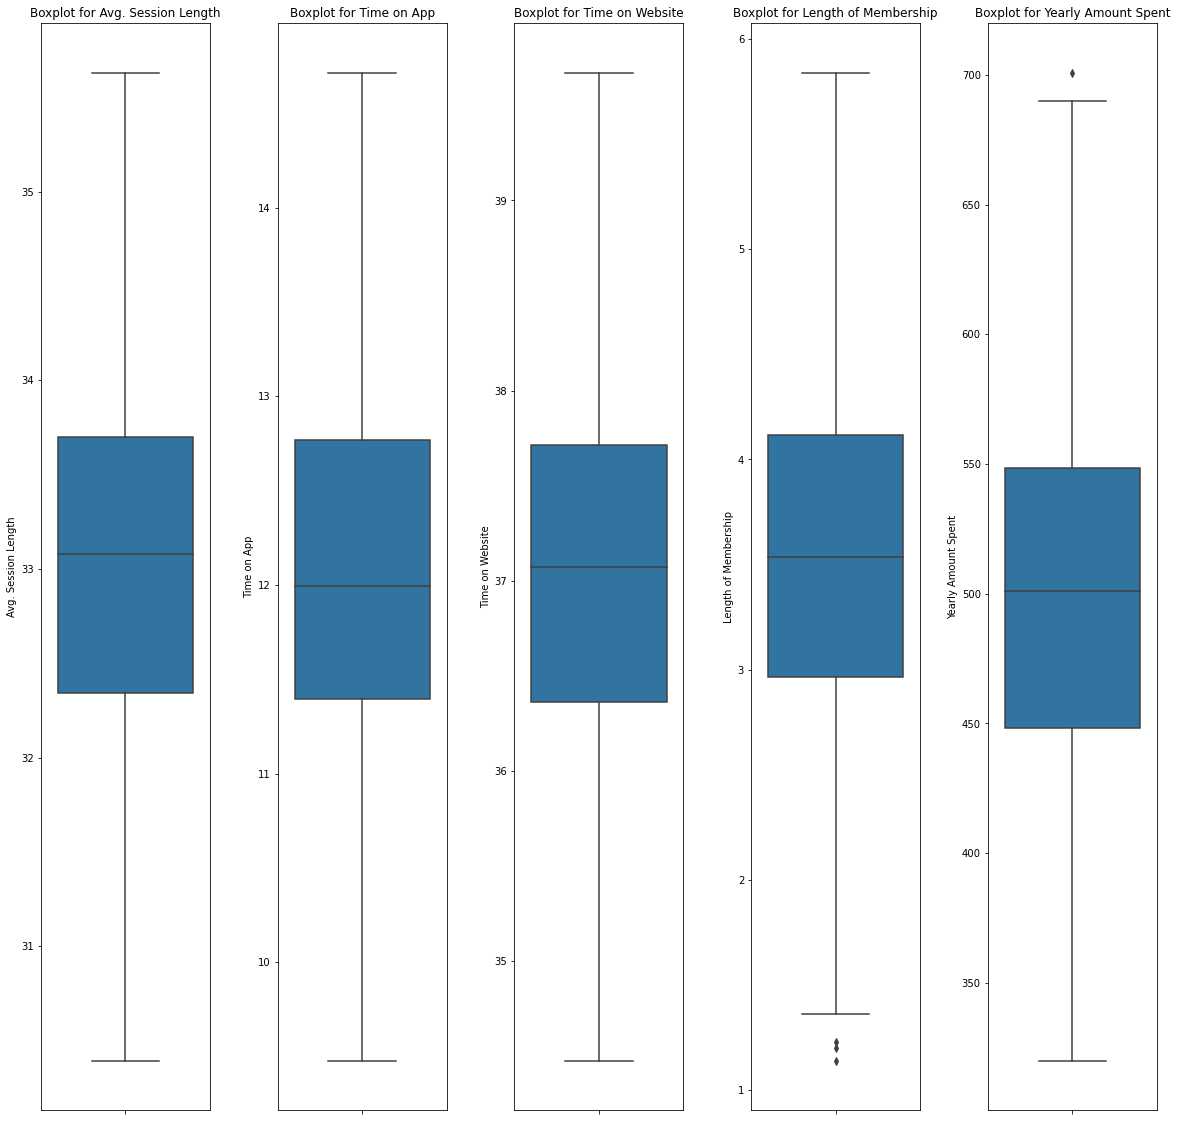

In [10]:
boxplot_multi(modi_df)

# 상관분석

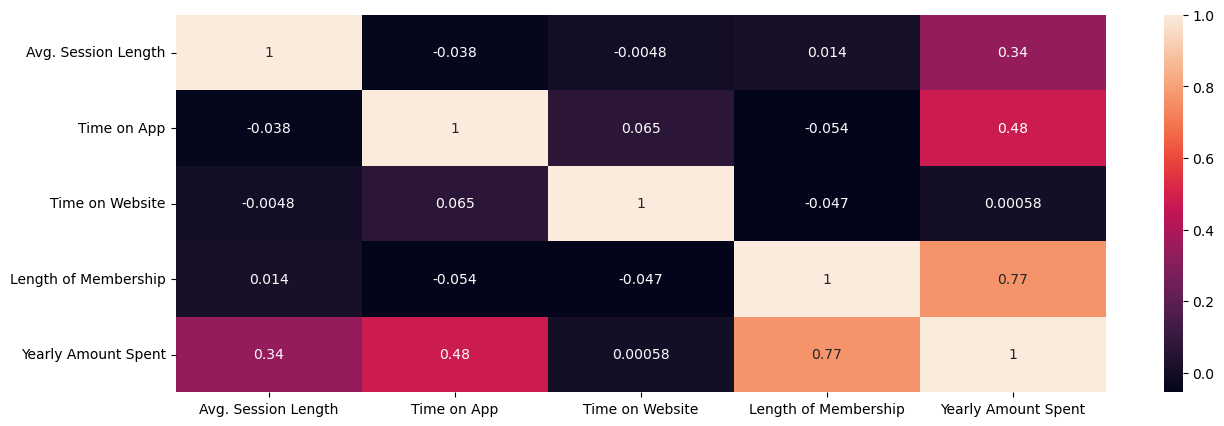

In [11]:
plt.figure(dpi=100, figsize=(15,5))
sns.heatmap(modi_df.corr(), annot=True)
plt.show()

# 데이터 분할 및 모델링

In [12]:
x = modi_df.drop('Yearly Amount Spent', axis=1) 
y = modi_df[["Yearly Amount Spent"]]

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# 평가

In [22]:
from sklearn.metrics import mean_squared_error

## MSE

In [24]:
mean_squared_error(y_test, y_pred)

105.30230640642326

## RMSE

* 다시 한 번 정정합니다. RMSE는 다음과 같이 사용합니다.

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

10.26169120595739

In [20]:
model.score(x_test, y_test)

0.9814458374844367

# 결과 시각화

* 예측 데이터 및 실제 데이터 병합

In [35]:
y_pred = pd.DataFrame(y_pred)
y_test = y_test.reset_index(drop=True)
comp_df = pd.concat([y_test,y_pred], axis=1)
comp_df.columns = ["real","predict"]

In [36]:
comp_df

real     predict
0   543.132626  535.371297
1   547.190749  536.311769
2   588.712606  578.038614
3   529.230090  518.546536
4   514.088958  509.196357
..         ...         ...
91  616.851523  606.109965
92  483.796522  481.110483
93  596.430173  619.288226
94  476.139247  474.079477
95  511.979860  507.440294

[96 rows x 2 columns]

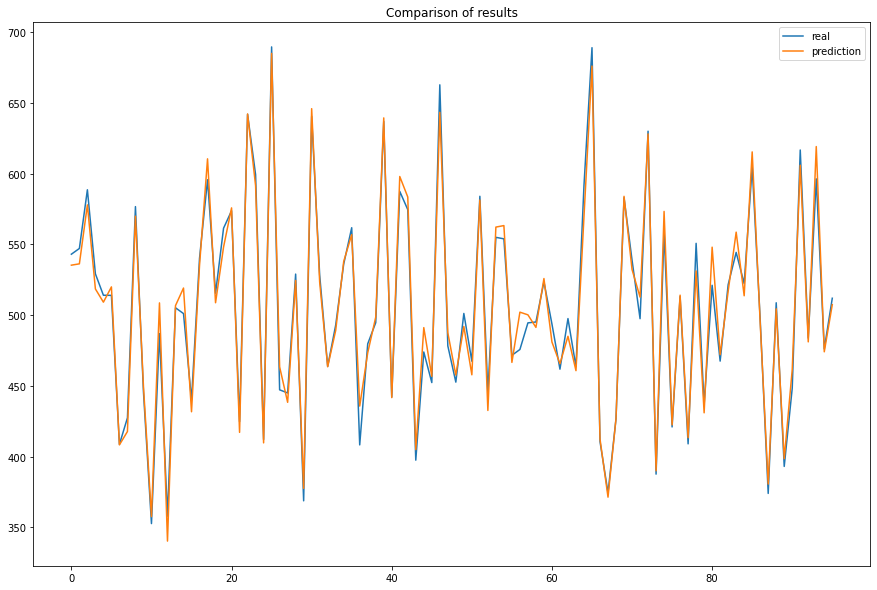

In [39]:
plt.figure(figsize=(15,10))
plt.title('Comparison of results')
plt.plot(comp_df)
plt.legend(['real', 'prediction']);